# Restaurant rating prdiction using Yelp API

In [1]:
# imports that I added during the project
import pandas as pd 
import requests
import csv
from bs4 import BeautifulSoup
import json
import time
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data acquisition- Yelp API

In [43]:
# Yelp API endpoint
url = "https://api.yelp.com/v3/businesses/search"

# Set your Yelp API key here
api_key = "ZD6mo9uhBu1r47JiATdVhe6sJs2_hPLki2IH6v9YzKpPLHqOMuebguyIn64ZmvvRqndrchjhh5iYCTaBtVYiZQv1ph8qBJoi-iW55MMLd9_4n3RhHpWFIklcpWlmZHYx"
businesses = []
# Parameters for the search
for city in ['NYC','San Francisco','Los Angeles']:
  for num in range(1,5):
    time.sleep(2)
    params = {
        "location": city,  # Example: Search businesses in San Francisco
        "limit": 19,  # Number of results per request
        "offset": 0 , # Starting offset for pagination
        "price": str(num)
    }
    
    n = 0
    # Number of businesses to retrieve
    desired_count =  len(businesses)+950
    while len(businesses) < desired_count and n<=19:
        n = n+1
        print(len(businesses))
        # Make a request to the Yelp API
        headers = {"Authorization": f"Bearer {api_key}"}
        response = requests.get(url, headers=headers, params=params)
        data = response.json()
        # print(data)
        # Extract business details from the response
        x = len(businesses)
        for business in data["businesses"]:
            print(business)
            transactions = business.get("transactions", [])
            delivery = 1 if "delivery" in transactions else 0
            pickup = 1 if "pickup" in transactions else 0       
            business_details = {
                "id":business["id"],
                "name": business["name"],
                "zipcode": business["location"]["zip_code"],
                "categories": ", ".join(category["title"] for category in business["categories"]),
                "pickup": pickup,
                "delivery": delivery,
                "price_range": business.get("price", ""),
                "rating": business.get("rating", "")
            }
            businesses.append(business_details)
            # print(businesses)  
        # Update the offset for the next request
        if  x == len(businesses):
            break
        params["offset"] += params["limit"]
#this is 
        if n == 19:
            break
        
    if n == 19:
        break

if n == 19:
    break


0
{'id': 'zj8Lq1T8KIC5zwFief15jg', 'alias': 'prince-street-pizza-new-york-2', 'name': 'Prince Street Pizza', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/PfI8oV4ct9ZJZNtUhSS8DQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/prince-street-pizza-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 4921, 'categories': [{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'italian', 'title': 'Italian'}], 'rating': 4.5, 'coordinates': {'latitude': 40.72308755605564, 'longitude': -73.99453001177575}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '27 Prince St', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10012', 'country': 'US', 'state': 'NY', 'display_address': ['27 Prince St', 'New York, NY 10012']}, 'phone': '+12129664100', 'display_phone': '(212) 966-4100', 'distance': 2197.6339819772857}
{'id': 'j1S3NUrkB3BV

{'id': 'kNOr6_g6QfBHdhf89j3g5w', 'alias': 'taiwan-pork-chop-house-new-york', 'name': 'Taiwan Pork Chop House', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/VmE9AvyeJXg8VKmPMbUPOw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/taiwan-pork-chop-house-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 613, 'categories': [{'alias': 'taiwanese', 'title': 'Taiwanese'}, {'alias': 'chinese', 'title': 'Chinese'}, {'alias': 'noodles', 'title': 'Noodles'}], 'rating': 4.0, 'coordinates': {'latitude': 40.71429, 'longitude': -73.99798}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '3 Doyers St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10013', 'country': 'US', 'state': 'NY', 'display_address': ['3 Doyers St', 'New York, NY 10013']}, 'phone': '+12127917007', 'display_phone': '(212) 791-7007', 'distance': 1786.7475909669186}


{'id': 'nOCjslrdcKBQQYgD5qUs9Q', 'alias': 'kam-hing-coffee-shop-new-york-2', 'name': 'Kam Hing Coffee Shop', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/fZwPvEm-5Zfxdt6xBB9I2A/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/kam-hing-coffee-shop-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 855, 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}], 'rating': 4.5, 'coordinates': {'latitude': 40.71798, 'longitude': -73.99921}, 'transactions': [], 'price': '$', 'location': {'address1': '118 Baxter St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10013', 'country': 'US', 'state': 'NY', 'display_address': ['118 Baxter St', 'New York, NY 10013']}, 'phone': '+16465527867', 'display_phone': '(646) 552-7867', 'distance': 2084.7778798254544}
{'id': 'L6DAp6L1ZJKeeDN2PwoOLQ', 'alias': 'adels

{'id': '4h4Tuuc56YPO6lWfZ1bdSQ', 'alias': 'joes-pizza-new-york-152', 'name': "Joe's Pizza", 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/dxFrYV5dwtAg0TAPs7CpEg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/joes-pizza-new-york-152?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 471, 'categories': [{'alias': 'pizza', 'title': 'Pizza'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7101297729083, 'longitude': -74.0077206864953}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '124 Fulton St', 'address2': '', 'address3': None, 'city': 'New York', 'zip_code': '10038', 'country': 'US', 'state': 'NY', 'display_address': ['124 Fulton St', 'New York, NY 10038']}, 'phone': '+12122670860', 'display_phone': '(212) 267-0860', 'distance': 2448.5118272947116}
{'id': 's-n0KW8iqiq-C96tpxm2rA', 'alias': 'the-hairy-lemon-pub-new-york', 'name': 'The 

{'id': 'XA7phnS0fBfLR8xdsngiUQ', 'alias': 'gottscheer-hall-ridgewood', 'name': 'Gottscheer Hall', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/gOLNWBRYfJfwA_m5_WhgZQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/gottscheer-hall-ridgewood?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 58, 'categories': [{'alias': 'catering', 'title': 'Caterers'}, {'alias': 'german', 'title': 'German'}, {'alias': 'beerbar', 'title': 'Beer Bar'}], 'rating': 4.5, 'coordinates': {'latitude': 40.706891, 'longitude': -73.905479}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '657 Fairview Ave', 'address2': '', 'address3': '', 'city': 'Ridgewood', 'zip_code': '11385', 'country': 'US', 'state': 'NY', 'display_address': ['657 Fairview Ave', 'Ridgewood, NY 11385']}, 'phone': '+17183663030', 'display_phone': '(718) 366-3030', 'distance': 6194.1547777834885}
{'id': 'B

{'id': 'Qmv4SPta2zx7MhKit8ywag', 'alias': 'absolute-coffee-brooklyn', 'name': 'Absolute Coffee', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/_wfgUJ4SiZbcOz-yimhHhw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/absolute-coffee-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 224, 'categories': [{'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'bakeries', 'title': 'Bakeries'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}], 'rating': 4.5, 'coordinates': {'latitude': 40.688205676769584, 'longitude': -73.98763887501784}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '327 Atlantic Ave', 'address2': None, 'address3': '', 'city': 'Brooklyn', 'zip_code': '11201', 'country': 'US', 'state': 'NY', 'display_address': ['327 Atlantic Ave', 'Brooklyn, NY 11201']}, 'phone': '+17185220969', 'display_phone': '(718) 522-0969', 'dis

{'id': 'GRXvvB1OKMuW4XDWEaVAlg', 'alias': 'joes-pizza-brooklyn-8', 'name': "Joe's Pizza", 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/uf4DZxCD8qOSi6rjpTcTJQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/joes-pizza-brooklyn-8?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 443, 'categories': [{'alias': 'pizza', 'title': 'Pizza'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7168952, 'longitude': -73.95892996733771}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '216 Bedford Ave', 'address2': '', 'address3': None, 'city': 'Brooklyn', 'zip_code': '11249', 'country': 'US', 'state': 'NY', 'display_address': ['216 Bedford Ave', 'Brooklyn, NY 11249']}, 'phone': '+17183882216', 'display_phone': '(718) 388-2216', 'distance': 1996.8809289050694}
{'id': 'qzdCvtgpCDjNVV_zRJB5EQ', 'alias': 'voyager-espresso-new-york', 'name': 'Voyager Espr

{'id': 'atbANdSznV29GI066I2Ijw', 'alias': 'champion-pizza-new-york-6', 'name': 'Champion Pizza', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/SBZL50PVgk_0mYbo9_RsBQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/champion-pizza-new-york-6?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 421, 'categories': [{'alias': 'pizza', 'title': 'Pizza'}], 'rating': 4.5, 'coordinates': {'latitude': 40.7215270996094, 'longitude': -73.9970855712891}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '17 Cleveland Pl', 'address2': None, 'address3': None, 'city': 'New York', 'zip_code': '10012', 'country': 'US', 'state': 'NY', 'display_address': ['17 Cleveland Pl', 'New York, NY 10012']}, 'phone': '+12122263777', 'display_phone': '(212) 226-3777', 'distance': 2200.525340620379}
{'id': 'PWFK0nvJ23Xkk_B4C5Q4Aw', 'alias': 'factory-tamal-new-york-4', 'name

{'id': 'K2d_jyiym-61tHTFeHrk2g', 'alias': 'ole-and-steen-new-york', 'name': 'Ole & Steen', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/KnYbNrEiq-4vcWlzmJAo4w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/ole-and-steen-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 262, 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}], 'rating': 4.0, 'coordinates': {'latitude': 40.73806001359636, 'longitude': -73.99023000756564}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '873 Broadway', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10003', 'country': 'US', 'state': 'NY', 'display_address': ['873 Broadway', 'New York, NY 10003']}, 'phone': '+19292091020', 'display_phone': '(929) 209-1020', 'distance': 3555.3205

{'id': 'nyxmTe-It-tzfagvjkge1g', 'alias': 'burrow-brooklyn', 'name': 'Burrow', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/mebngCLJHN05G7fD7ATclw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/burrow-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 86, 'categories': [{'alias': 'desserts', 'title': 'Desserts'}, {'alias': 'cakeshop', 'title': 'Patisserie/Cake Shop'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}], 'rating': 4.5, 'coordinates': {'latitude': 40.7027771713273, 'longitude': -73.98680411986894}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '68 Jay St', 'address2': 'Ste 119', 'address3': '', 'city': 'Brooklyn', 'zip_code': '11201', 'country': 'US', 'state': 'NY', 'display_address': ['68 Jay St', 'Ste 119', 'Brooklyn, NY 11201']}, 'phone': '', 'display_phone': '', 'distance': 830.501353931299}
{'id': 'qIOdughNii7-OW88IFtPQw

{'id': 'VGTrGSH38A4n-v5nFe4skA', 'alias': 'uncle-gussys-new-york', 'name': "Uncle Gussy's", 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/TSMm3ArhrT5YRsHRHP5DOg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/uncle-gussys-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 479, 'categories': [{'alias': 'foodtrucks', 'title': 'Food Trucks'}, {'alias': 'greek', 'title': 'Greek'}], 'rating': 4.5, 'coordinates': {'latitude': 40.7576813278964, 'longitude': -73.9732953737526}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '345 Park Ave', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10154', 'country': 'US', 'state': 'NY', 'display_address': ['345 Park Ave', 'New York, NY 10154']}, 'phone': '+19296001111', 'display_phone': '(929) 600-1111', 'distance': 5626.971394537147}
{'id': 'AfZPx4piTmg9dqZpYgYTgg', 'alias': 'mo

{'id': '6xCZHAr7yj_vWwRJalAEOg', 'alias': 'seed-mill-new-york', 'name': 'Seed + Mill', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/PPITbsJnw_mIVZdSHrOL5w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/seed-mill-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 285, 'categories': [{'alias': 'desserts', 'title': 'Desserts'}, {'alias': 'icecream', 'title': 'Ice Cream & Frozen Yogurt'}, {'alias': 'gluten_free', 'title': 'Gluten-Free'}], 'rating': 4.5, 'coordinates': {'latitude': 40.7420723, 'longitude': -74.0056454}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '409 W 15th St', 'address2': '', 'address3': 'Chelsea Market', 'city': 'New York', 'zip_code': '10011', 'country': 'US', 'state': 'NY', 'display_address': ['409 W 15th St', 'Chelsea Market', 'New York, NY 10011']}, 'phone': '', 'display_phone': '', 'distance': 4478.753

{'id': '7zxV9U7_SJ1npeLCkHUzjg', 'alias': 'yankee-doodle-dandys-new-york-2', 'name': "Yankee Doodle Dandy's", 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/SRziMRfsOg56Sw6YYxX2Yg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/yankee-doodle-dandys-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 147, 'categories': [{'alias': 'foodtrucks', 'title': 'Food Trucks'}, {'alias': 'southern', 'title': 'Southern'}, {'alias': 'newamerican', 'title': 'American (New)'}], 'rating': 4.5, 'coordinates': {'latitude': 40.71424, 'longitude': -74.00642}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': None, 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '11121', 'country': 'US', 'state': 'NY', 'display_address': ['New York, NY 11121']}, 'phone': '+19732023130', 'display_phone': '(973) 202-3130', 'distance': 2361.336311881717

{'id': 'so3ReIE_QdVjeCsRhCCLLg', 'alias': 'kolkata-chai-cafe-new-york', 'name': 'Kolkata Chai Cafe', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/atIgTUv8UgmxZdBWdv3d0w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/kolkata-chai-cafe-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 102, 'categories': [{'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'indpak', 'title': 'Indian'}], 'rating': 4.0, 'coordinates': {'latitude': 40.72291487086537, 'longitude': -73.98321706640796}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '199 E 3rd St', 'address2': '', 'address3': None, 'city': 'New York', 'zip_code': '10009', 'country': 'US', 'state': 'NY', 'display_address': ['199 E 3rd St', 'New York, NY 10009']}, 'phone': '+16468923023', 'display_phone': '(646) 892-3023', 'distance': 1778.389686166922}
{'id': '4qtJ_u-7-73ts5UPa6NBmA', 'alia

{'id': 'a7BC1doUjNDqrqTaAMmfZg', 'alias': 'bite-new-york', 'name': 'Bite', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/TwZI7h0HzbdECV7Tv7WQWg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/bite-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 290, 'categories': [{'alias': 'sandwiches', 'title': 'Sandwiches'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}, {'alias': 'mediterranean', 'title': 'Mediterranean'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7257318645125, 'longitude': -73.9946338116395}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '335 Lafayette St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10012', 'country': 'US', 'state': 'NY', 'display_address': ['335 Lafayette St', 'New York, NY 10012']}, 'phone': '+12124310301', 'display_phone': '(212) 431-0301', 'distance': 2444

{'id': '68cim4K69TGznUL0RQMcpg', 'alias': 't-swirl-crepe-new-york-20', 'name': 'T-Swirl Crepe', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/tkC7Q2ezQPLaaFiu30m81A/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/t-swirl-crepe-new-york-20?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 247, 'categories': [{'alias': 'desserts', 'title': 'Desserts'}, {'alias': 'gluten_free', 'title': 'Gluten-Free'}, {'alias': 'creperies', 'title': 'Creperies'}], 'rating': 4.5, 'coordinates': {'latitude': 40.71393, 'longitude': -73.9985899}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '2 Mott St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10013', 'country': 'US', 'state': 'NY', 'display_address': ['2 Mott St', 'New York, NY 10013']}, 'phone': '+12128849280', 'display_phone': '(212) 884-9280', 'distance': 1805.3574714835113}
{'i

{'id': 'CYYLEipRFmr73Hz6XNEzoQ', 'alias': 'little-italy-pizza-new-york-5', 'name': 'Little Italy Pizza', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/Oivp0ZIFFkS20riaDCnt0g/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/little-italy-pizza-new-york-5?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 602, 'categories': [{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'salad', 'title': 'Salad'}, {'alias': 'pastashops', 'title': 'Pasta Shops'}], 'rating': 4.0, 'coordinates': {'latitude': 40.756482, 'longitude': -73.981484}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '55 W 45th St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10036', 'country': 'US', 'state': 'NY', 'display_address': ['55 W 45th St', 'New York, NY 10036']}, 'phone': '+12127307575', 'display_phone': '(212) 730-7575', 'distance': 5477.8781690295455}

{'id': 'j_x5CbFjKfPcvakcWCE_hA', 'alias': 'kings-kolache-brooklyn', 'name': 'Kings Kolache', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/XbqeB_RtrH5UsJYJg-AgYA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/kings-kolache-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 41, 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}, {'alias': 'tex-mex', 'title': 'Tex-Mex'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}], 'rating': 5.0, 'coordinates': {'latitude': 40.708076, 'longitude': -73.9205073}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '321 Starr St', 'address2': '', 'address3': None, 'city': 'Brooklyn', 'zip_code': '11237', 'country': 'US', 'state': 'NY', 'display_address': ['321 Starr St', 'Brooklyn, NY 11237']}, 'phone': '+18456143226', 'display_phone': '(845) 614-3226', 'distance': 4924.521787312711}
{'id': 'w2

{'id': 'u9zVZH0liQu9skIz1kGrMA', 'alias': 'heavens-hot-bagel-new-york', 'name': "Heaven's Hot Bagel", 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/wTDyfoBGAs5i0_1JVn0sZw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/heavens-hot-bagel-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 250, 'categories': [{'alias': 'bagels', 'title': 'Bagels'}, {'alias': 'delis', 'title': 'Delis'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}], 'rating': 4.0, 'coordinates': {'latitude': 40.72131, 'longitude': -73.98436}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '283 E Houston St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10002', 'country': 'US', 'state': 'NY', 'display_address': ['283 E Houston St', 'New York, NY 10002']}, 'phone': '+12124207566', 'display_phone': '(212) 420-7566', 'distance': 1631.350833780

361
{'id': 'PTFxtXS47ZVRCdZIrEWvGw', 'alias': 'golden-boy-pizza-san-francisco', 'name': 'Golden Boy Pizza', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/IqWF-Qn2EPdwkEDi4Y_lDA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/golden-boy-pizza-san-francisco?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 4222, 'categories': [{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'italian', 'title': 'Italian'}], 'rating': 4.5, 'coordinates': {'latitude': 37.7997956, 'longitude': -122.4080729}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '542 Green St', 'address2': '', 'address3': '', 'city': 'San Francisco', 'zip_code': '94133', 'country': 'US', 'state': 'CA', 'display_address': ['542 Green St', 'San Francisco, CA 94133']}, 'phone': '+14159829738', 'display_phone': '(415) 982-9738', 'distance': 4992.437696561071}
{'id': 'SGRmnarrNuVEsAjYdEoA0w', 'ali

{'id': '7CR8EP4gV-oYXyNa2-PTcw', 'alias': 'golden-gate-fortune-cookie-factory-san-francisco', 'name': 'Golden Gate Fortune Cookie Factory', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/BgR-KGR__wxH8_fdqdiZPg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/golden-gate-fortune-cookie-factory-san-francisco?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 1232, 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}], 'rating': 4.5, 'coordinates': {'latitude': 37.79577, 'longitude': -122.40725}, 'transactions': [], 'price': '$', 'location': {'address1': '56 Ross Aly', 'address2': '', 'address3': '', 'city': 'San Francisco', 'zip_code': '94108', 'country': 'US', 'state': 'CA', 'display_address': ['56 Ross Aly', 'San Francisco, CA 94108']}, 'phone': '+14157813956', 'display_phone': '(415) 781-3956', 'distance': 4650.337736329732}
{'id': 'vmwLmMvOK-JB2uT3Cqinyw', 'alias

{'id': 'Jd28dXIWRxGwXKbfrnXq3g', 'alias': 'il-canto-cafe-san-francisco-7', 'name': 'Il Canto Cafe', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/O49KteXH20hmQRbVvH0u6A/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/il-canto-cafe-san-francisco-7?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 572, 'categories': [{'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'cafes', 'title': 'Cafes'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}], 'rating': 4.5, 'coordinates': {'latitude': 37.794016, 'longitude': -122.4006876}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '475 Sacramento St', 'address2': '', 'address3': '', 'city': 'San Francisco', 'zip_code': '94111', 'country': 'US', 'state': 'CA', 'display_address': ['475 Sacramento St', 'San Francisco, CA 94111']}, 'phone': '+14152023593', 'display_phone': '(415) 202-

{'id': 'AQviX2W0XXJqYtc73KaNxQ', 'alias': 'marcellos-pizza-san-francisco', 'name': "Marcello's Pizza", 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/TWM37eLzQKOBxnJ_gn0Jmw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/marcellos-pizza-san-francisco?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 778, 'categories': [{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'salad', 'title': 'Salad'}, {'alias': 'gluten_free', 'title': 'Gluten-Free'}], 'rating': 4.0, 'coordinates': {'latitude': 37.76212241225501, 'longitude': -122.4353164659444}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '420 Castro St', 'address2': '', 'address3': '', 'city': 'San Francisco', 'zip_code': '94114', 'country': 'US', 'state': 'CA', 'display_address': ['420 Castro St', 'San Francisco, CA 94114']}, 'phone': '+14158633900', 'display_phone': '(415) 863-3900', 'dis

{'id': 'UdRV_X0aah6c2_LLbB8dGg', 'alias': 'yama-chan-san-francisco', 'name': 'Yama-chan', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/uvgmmk4LDybM7DF7O5sU8A/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/yama-chan-san-francisco?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 221, 'categories': [{'alias': 'japanese', 'title': 'Japanese'}], 'rating': 4.0, 'coordinates': {'latitude': 37.7850837968313, 'longitude': -122.4305618722681}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '1737 Post St', 'address2': 'Unit 395', 'address3': None, 'city': 'San Francisco', 'zip_code': '94115', 'country': 'US', 'state': 'CA', 'display_address': ['1737 Post St', 'Unit 395', 'San Francisco, CA 94115']}, 'phone': '', 'display_phone': '', 'distance': 2738.478627927089}
{'id': '9hkKmtG2BruWwrqltt0Klg', 'alias': 'chai-bar-by-david-rio-san-francisco-4', 'name': 

{'id': 'JZ1CWLfJ1cm6fuHkU2vo-g', 'alias': 'mannys-san-francisco', 'name': "Manny's", 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/4a-x3MWKGrnRLu5kKDN-rQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/mannys-san-francisco?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 196, 'categories': [{'alias': 'cafes', 'title': 'Cafes'}, {'alias': 'venues', 'title': 'Venues & Event Spaces'}, {'alias': 'nonprofit', 'title': 'Community Service/Non-Profit'}], 'rating': 4.5, 'coordinates': {'latitude': 37.76517, 'longitude': -122.42159}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '3092 16th St', 'address2': '', 'address3': None, 'city': 'San Francisco', 'zip_code': '94103', 'country': 'US', 'state': 'CA', 'display_address': ['3092 16th St', 'San Francisco, CA 94103']}, 'phone': '+14158964052', 'display_phone': '(415) 896-4052', 'distance': 1381.597949414

{'id': 'o9KZAEgORSys5J4oqiGtEg', 'alias': 'taqueria-el-buen-sabor-san-francisco', 'name': 'Taqueria El Buen Sabor', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/2RE1JQmeVh8ouAJfUbW3yg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/taqueria-el-buen-sabor-san-francisco?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 676, 'categories': [{'alias': 'mexican', 'title': 'Mexican'}], 'rating': 4.0, 'coordinates': {'latitude': 37.7618209086132, 'longitude': -122.42140524173}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '699 Valencia St', 'address2': None, 'address3': '', 'city': 'San Francisco', 'zip_code': '94110', 'country': 'US', 'state': 'CA', 'display_address': ['699 Valencia St', 'San Francisco, CA 94110']}, 'phone': '+14155528816', 'display_phone': '(415) 552-8816', 'distance': 1326.2538871255242}
{'id': 'xSWJlaiXDSMHyNpOAIYJqg', 

{'id': 'KttlGeHJixRHTLyqyefx8Q', 'alias': 'the-little-spot-cafe-san-francisco', 'name': 'The Little Spot Cafe', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/QFfLnt_oChqt_p8SDkhcrA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-little-spot-cafe-san-francisco?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 103, 'categories': [{'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'bagels', 'title': 'Bagels'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}], 'rating': 4.5, 'coordinates': {'latitude': 37.75411, 'longitude': -122.41607}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '1199 S Van Ness Ave', 'address2': '', 'address3': '', 'city': 'San Francisco', 'zip_code': '94110', 'country': 'US', 'state': 'CA', 'display_address': ['1199 S Van Ness Ave', 'San Francisco, CA 94110']}, 'phone': '+14155501800', 'display_phone': '(415) 550-1800

{'id': 'fDviyRsyS41ldbxQTS8e8w', 'alias': 'all-star-cafe-san-francisco-3', 'name': 'All Star Cafe', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/VRDFsbLLykleMaMwmThcFA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/all-star-cafe-san-francisco-3?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 223, 'categories': [{'alias': 'donuts', 'title': 'Donuts'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}], 'rating': 4.0, 'coordinates': {'latitude': 37.776229, 'longitude': -122.41503}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '98 9th St', 'address2': '', 'address3': '', 'city': 'San Francisco', 'zip_code': '94103', 'country': 'US', 'state': 'CA', 'display_address': ['98 9th St', 'San Francisco, CA 94103']}, 'phone': '+14158634949', 'display_phone': '(415) 863-4949', 'distance

{'id': 'ENOSkB2B8NZNxOtNFmFAZg', 'alias': 'benders-bar-and-grill-san-francisco', 'name': "Bender's Bar and Grill", 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/_FXcxhV8bbnFdsNSm8-e8w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/benders-bar-and-grill-san-francisco?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 448, 'categories': [{'alias': 'divebars', 'title': 'Dive Bars'}, {'alias': 'tradamerican', 'title': 'American (Traditional)'}], 'rating': 4.0, 'coordinates': {'latitude': 37.7601948, 'longitude': -122.4171804}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '806 S Van Ness Ave', 'address2': '', 'address3': '', 'city': 'San Francisco', 'zip_code': '94110', 'country': 'US', 'state': 'CA', 'display_address': ['806 S Van Ness Ave', 'San Francisco, CA 94110']}, 'phone': '+14158241800', 'display_phone': '(415) 824-1800', 'distance': 1695.5

{'id': 'uRxCjtTvJpcrD510tIDKcA', 'alias': 'the-homestead-san-francisco', 'name': 'The Homestead', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/rdnjbrUhny7xeQ5GsNeTEQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-homestead-san-francisco?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 350, 'categories': [{'alias': 'bars', 'title': 'Bars'}, {'alias': 'venues', 'title': 'Venues & Event Spaces'}], 'rating': 4.0, 'coordinates': {'latitude': 37.7603950500488, 'longitude': -122.414512634277}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '2301 Folsom St', 'address2': None, 'address3': '', 'city': 'San Francisco', 'zip_code': '94110', 'country': 'US', 'state': 'CA', 'display_address': ['2301 Folsom St', 'San Francisco, CA 94110']}, 'phone': '+14152824663', 'display_phone': '(415) 282-4663', 'distance': 1915.3171077538839}
{'id': 'dNyfcHW9qlAo9V

{'id': 'J9UyFeAMsZhqCFNxSFNNkw', 'alias': 'all-star-donuts-san-francisco-3', 'name': 'All Star Donuts', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/7YzHMmZhSDZJGi090ngtrA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/all-star-donuts-san-francisco-3?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 302, 'categories': [{'alias': 'donuts', 'title': 'Donuts'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}], 'rating': 4.5, 'coordinates': {'latitude': 37.78259, 'longitude': -122.46896}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '901 Clement St', 'address2': '', 'address3': '', 'city': 'San Francisco', 'zip_code': '94118', 'country': 'US', 'state': 'CA', 'display_address': ['901 Clement St', 'San Francisco, CA 94118']}, 'phone': '+14152219838', 'display_phone': '(415) 221-9838', 'distanc

{'id': 'UCn4pqLpAdU1OjpoorA0og', 'alias': 'boudin-san-francisco-8', 'name': 'Boudin', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/IjN_9z5Lv4zw9RjwyaWoDg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/boudin-san-francisco-8?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 263, 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}, {'alias': 'burgers', 'title': 'Burgers'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}], 'rating': 4.0, 'coordinates': {'latitude': 37.7811241149902, 'longitude': -122.468803405762}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '399 10th Ave', 'address2': '', 'address3': '', 'city': 'San Francisco', 'zip_code': '94118', 'country': 'US', 'state': 'CA', 'display_address': ['399 10th Ave', 'San Francisco, CA 94118']}, 'phone': '+14152211210', 'display_phone': '(415) 221-1210', 'distance': 3625.5489527

KeyboardInterrupt: 

In [3]:
# # Yelp API endpoint
# url = "https://api.yelp.com/v3/businesses/search"

# # Set your Yelp API key here
# api_key = "X5pBAYJoNxvYnbcJycQzc0RGJiDOQZ6s9ZeZn6TtvjzFJRXrLVy7vOQOCTI5F7Cs77-09QXCBdZ1eU8UvzTK4wROKCnJPwK5rqviSrOjlbfTiG-1E0ZsrzdDkDNmZHYx"
# # businesses = []
# # Parameters for the search
# #'NYC','San Francisco','Los Angeles']:

# params = {
#     "location": 'Los Angeles',  # Example: Search businesses in San Francisco
#     "limit": 19,  # Number of results per request
#     "offset": 0 , # Starting offset for pagination
#     "price": '4'
# }

# # Number of businesses to retrieve
# desired_count =  len(businesses)+950
# while len(businesses) < desired_count:
#     print(len(businesses))
#     # Make a request to the Yelp API
#     headers = {"Authorization": f"Bearer {api_key}"}
#     response = requests.get(url, headers=headers, params=params)
#     data = response.json()
#     print(data)
#     # Extract business details from the response
#     x = len(businesses)
#     for business in data["businesses"]:
#         print(business)
#         transactions = business.get("transactions", [])
#         delivery = 1 if "delivery" in transactions else 0
#         pickup = 1 if "pickup" in transactions else 0       
#         business_details = {
#             "id":business["id"],
#             "name": business["name"],
#             "zipcode": business["location"]["zip_code"],
#             "categories": ", ".join(category["title"] for category in business["categories"]),
#             "pickup": pickup,
#             "delivery": delivery,
#             "price_range": business.get("price", ""),
#             "rating": business.get("rating", "")
#         }
#         businesses.append(business_details)
#         # print(businesses)  
#     # Update the offset for the next request
#     # if  x == len(businesses):
#     #     break
#     params["offset"] += params["limit"]
#     print("************************")
#     print(params["offset"])

In [4]:
# # Save the retrieved businesses to a CSV file
# filename = "data.csv"
# fields = ["id","name", "zipcode",  "categories", "pickup", "delivery", "price_range", "rating"]

# with open(filename, mode="w", newline="") as file:
#     writer = csv.DictWriter(file, fieldnames=fields)
#     writer.writeheader()
#     writer.writerows(businesses[:])  # Write the desired number of businesses

# print(f"Business details saved to {filename}!")

Created the data from the YELP API, saved it as a csv file and opened it with pandas. 

In [5]:
## created DF 
df = pd.read_csv(r"C:\Users\HP\Downloads\data.csv")
df.head()

,id,name,zipcode,categories,pickup,delivery,price_range,rating
0,zj8Lq1T8KIC5zwFief15jg,Prince Street Pizza,10012.0,"pizza, italian",1,1,$,4.5
1,j1S3NUrkB3BVT49n_e76NQ,Best Bagel & Coffee,10001.0,"bagels, coffee & tea, breakfast & brunch",1,1,$,4.5
2,SULHf6nGQ8sK0UpG1XU30w,Los Tacos No.1,10036.0,tacos,0,1,$,4.5
3,v1DHGRNCH9247WLYoaoA9A,L'industrie Pizzeria,11211.0,pizza,0,1,$,4.5
4,vk7W3_sQwr7eZbRFsXv6rw,Taiyaki NYC,10013.0,"desserts, japanese, ice cream & frozen yogurt",0,1,$,4.5


### Feature explanataion:
1. Id - the id came from the json, each restaurant has its own id.
2. Name - the name of the resteraunt.
3. zipcode - the zipcode of the resturant.
4. categories - the types of food in each restaurant.
5. pickup - 1 if the resteraunt do pickup, 0 if not.
6. delivery -  1 if the resteraunt do delivery, 0 if not.
7. price_range - the price range of the restaurant, the range between 1 and 4.
8. rating - the rating of the restaurant, the range between 1 and 5.


## Data Analysis

We want to understand which variables are important, view summary statistics, and visualize the data.

In [6]:
df.shape

(7785, 8)

We see that there are 7785 rows and 8 columns in the data.

In [7]:
df.describe()

,zipcode,pickup,delivery,rating
count,7784.000000,7785.000000,7785.000000,7785.000000
mean,58646.904162,0.579576,0.788311,4.101606
std,40229.920234,0.493659,0.408532,0.457625
min,7002.000000,0.000000,0.000000,1.000000
25%,10028.000000,0.000000,1.000000,4.000000
50%,90017.000000,1.000000,1.000000,4.000000
75%,94103.000000,1.000000,1.000000,4.500000
max,95838.000000,1.000000,1.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7785 entries, 0 to 7784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7785 non-null   object 
 1   name         7785 non-null   object 
 2   zipcode      7784 non-null   float64
 3   categories   7785 non-null   object 
 4   pickup       7785 non-null   int64  
 5   delivery     7785 non-null   int64  
 6   price_range  7785 non-null   object 
 7   rating       7785 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 486.7+ KB


We see here that there are no empty values, so the data is good

In [9]:
## convert $ to number
for index, value in df['price_range'].iteritems():
    length = len(value)
    df.at[index, 'price_range'] = length
df['price_range'] = df['price_range'].astype(int)
df.head()

,id,name,zipcode,categories,pickup,delivery,price_range,rating
0,zj8Lq1T8KIC5zwFief15jg,Prince Street Pizza,10012.0,"pizza, italian",1,1,1,4.5
1,j1S3NUrkB3BVT49n_e76NQ,Best Bagel & Coffee,10001.0,"bagels, coffee & tea, breakfast & brunch",1,1,1,4.5
2,SULHf6nGQ8sK0UpG1XU30w,Los Tacos No.1,10036.0,tacos,0,1,1,4.5
3,v1DHGRNCH9247WLYoaoA9A,L'industrie Pizzeria,11211.0,pizza,0,1,1,4.5
4,vk7W3_sQwr7eZbRFsXv6rw,Taiyaki NYC,10013.0,"desserts, japanese, ice cream & frozen yogurt",0,1,1,4.5


I converted the $ sign to a number so that at the stage of the prediction I would have only numbers and not other objects.

In [10]:
##split categories
##עשיתי את השורה הזאת כבר אך לא יכול להחזיר את זה לאותיות גדולות כמו שקיבלתי כי אז אצטרך להוציא שוב וזה יקח המון זמן
df['categories'] = df['categories'].apply(lambda x: x.lower())
categories = ['American', 'Italian', 'Asia', 'breakfast', 'bar', 'others']
df[categories] = 0

category_lists = {
    'American': ['american', 'steakhouse', 'chicken', 'burger', 'hamburger', 'steak', 'fast food', 'donuts'],
    'Asia': ['dim sum', 'sushi', 'japanese', 'chinese', 'thai', 'viet', 'vietnamese', 'taiwanese', 'noodles', 'ramen', 'curry', 'malaysian', 'cambodian'],
    'bar': ['bar', 'pub', 'cocktails', 'drinks', 'party', 'club'],
    'breakfast': ['brunch', 'coffee', 'bagel', 'breakfast', 'tea', 'sandwich', 'bakeries', 'delis'],
    'Italian': ['italian', 'pizza', 'pasta', 'gelato']
}

for index, category in df['categories'].iteritems():
    found_category = False
    for cat, cat_list in category_lists.items():
        if any(x in category for x in cat_list):
            df.at[index, cat] = 1
            found_category = True
    if not found_category:
        df.at[index, 'others'] = 1
df.head()

,id,name,zipcode,categories,pickup,delivery,price_range,rating,American,Italian,Asia,breakfast,bar,others
0,zj8Lq1T8KIC5zwFief15jg,Prince Street Pizza,10012.0,"pizza, italian",1,1,1,4.5,0,1,0,0,0,0
1,j1S3NUrkB3BVT49n_e76NQ,Best Bagel & Coffee,10001.0,"bagels, coffee & tea, breakfast & brunch",1,1,1,4.5,0,0,0,1,0,0
2,SULHf6nGQ8sK0UpG1XU30w,Los Tacos No.1,10036.0,tacos,0,1,1,4.5,0,0,0,0,0,1
3,v1DHGRNCH9247WLYoaoA9A,L'industrie Pizzeria,11211.0,pizza,0,1,1,4.5,0,1,0,0,0,0
4,vk7W3_sQwr7eZbRFsXv6rw,Taiyaki NYC,10013.0,"desserts, japanese, ice cream & frozen yogurt",0,1,1,4.5,0,0,1,0,0,0


I split the categories into 6 selected and more central categories so that I only have numbers and no other objects in the data for the prediction

In [11]:
#remove the coloms the i dont need to לחזות
df = df.drop(['categories','id' ,'zipcode' ], axis=1)
df.head()

,name,pickup,delivery,price_range,rating,American,Italian,Asia,breakfast,bar,others
0,Prince Street Pizza,1,1,1,4.5,0,1,0,0,0,0
1,Best Bagel & Coffee,1,1,1,4.5,0,0,0,1,0,0
2,Los Tacos No.1,0,1,1,4.5,0,0,0,0,0,1
3,L'industrie Pizzeria,0,1,1,4.5,0,1,0,0,0,0
4,Taiyaki NYC,0,1,1,4.5,0,0,1,0,0,0


I deleted these columns because they do not help me in the prediction - values that would bother me

In [12]:
desired_order = [ 'name', 'Italian', 'breakfast', 'Asia', 'American', 'bar', 'others',
                 'pickup', 'delivery', 'price_range', 'rating']

# Reindex the DataFrame with the desired column order
df = df.reindex(columns=desired_order)
df.head()

,name,Italian,breakfast,Asia,American,bar,others,pickup,delivery,price_range,rating
0,Prince Street Pizza,1,0,0,0,0,0,1,1,1,4.5
1,Best Bagel & Coffee,0,1,0,0,0,0,1,1,1,4.5
2,Los Tacos No.1,0,0,0,0,0,1,0,1,1,4.5
3,L'industrie Pizzeria,1,0,0,0,0,0,0,1,1,4.5
4,Taiyaki NYC,0,0,1,0,0,0,0,1,1,4.5


In [13]:
df.tail()

,name,Italian,breakfast,Asia,American,bar,others,pickup,delivery,price_range,rating
7780,Sushi Tsujita,0,0,1,0,1,0,1,1,4,4.0
7781,SHU Sushi House Unico,0,0,1,0,1,0,0,1,4,4.5
7782,BOA Steakhouse,0,1,0,1,0,0,1,1,4,4.0
7783,MORIHIRO,0,0,1,0,1,0,0,0,4,4.5
7784,Matsuhisa,0,0,1,0,1,0,0,1,4,4.0


In [14]:
#Check how many values are null in each column
df[df.columns[:]].isnull().sum()

name           0
Italian        0
breakfast      0
Asia           0
American       0
bar            0
others         0
pickup         0
delivery       0
price_range    0
rating         0
dtype: int64

There is not a single cell that is null, so this indicates good data.
Checks again if there are empty values before the EDA.

## EDA - Exploratory Data Analysis

In [15]:
# Calculating the number of restaurants for each rating
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Number_of_Restaurants']
print(rating_counts)

   Rating  Number_of_Restaurants
0     4.0                   3585
1     4.5                   2619
2     3.5                    965
3     5.0                    323
4     3.0                    209
5     2.5                     51
6     2.0                     22
7     1.5                      7
8     1.0                      4


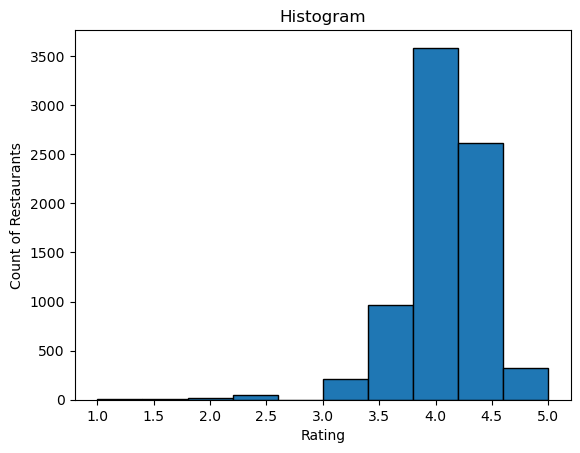

In [16]:
plt.hist(df['rating'], bins=10, edgecolor='black', range=(1, 5))

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Count of Restaurants')
plt.title('Histogram')

# Displaying the plot
plt.show()

You can see here that there are not many ratings of restaurants with a score of 1 to 3, so probably the less prediction will result in a score in this range

In [17]:
# Checking how many resturant rating are above 4 and 3.5
print(df[df['rating']>4].shape[0])
print(df[df['rating']>3.5].shape[0])

2942
6527


You can see here the amount of restaurants that are in the range between 3.5-4, most of the restaurants in this score

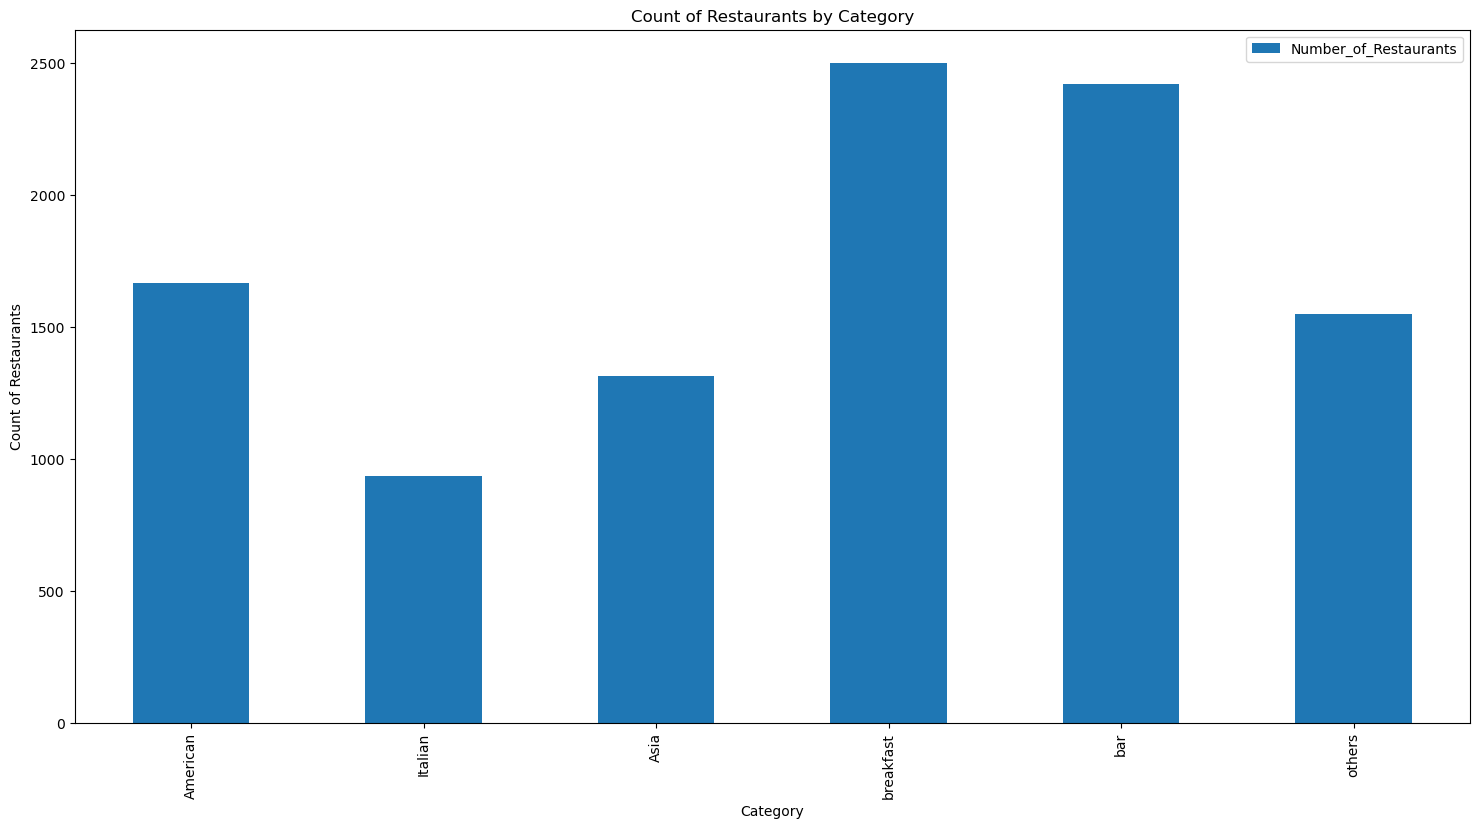

In [18]:
#plotting a graph of how many resturants got what category.
plt.rcParams['figure.figsize'] = (18, 9)
categories = ['American', 'Italian', 'Asia', 'breakfast', 'bar', 'others']
counts = [df[category].sum() for category in categories]
rating_counts = pd.DataFrame({'Category': categories, 'Number_of_Restaurants': counts})
rating_counts.plot(x='Category', y='Number_of_Restaurants', kind='bar')
plt.xlabel('Category')
plt.ylabel('Count of Restaurants')
plt.title('Count of Restaurants by Category')
plt.show()




As you can see there are enough resterautns of each category

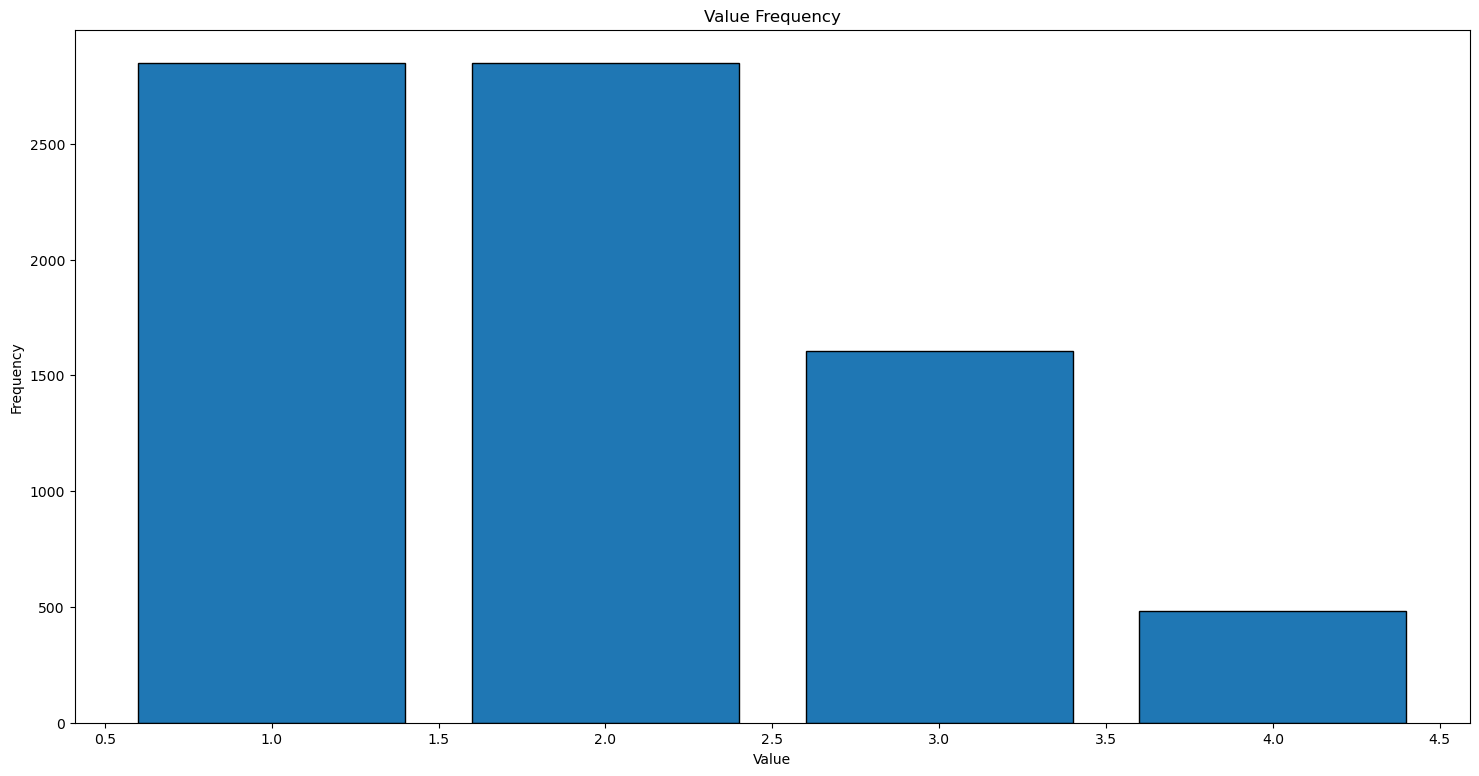

In [19]:
value_counts = df['price_range'].value_counts()

# Get the unique values and their frequencies
values = value_counts.index
frequencies = value_counts.values

# Plotting the bar plot
plt.bar(values, frequencies, edgecolor='black')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Value Frequency')

# Displaying the plot
plt.show()

The price range is mostly in the range of 1 and 2 but there are stil enough frequencies of the other prices 

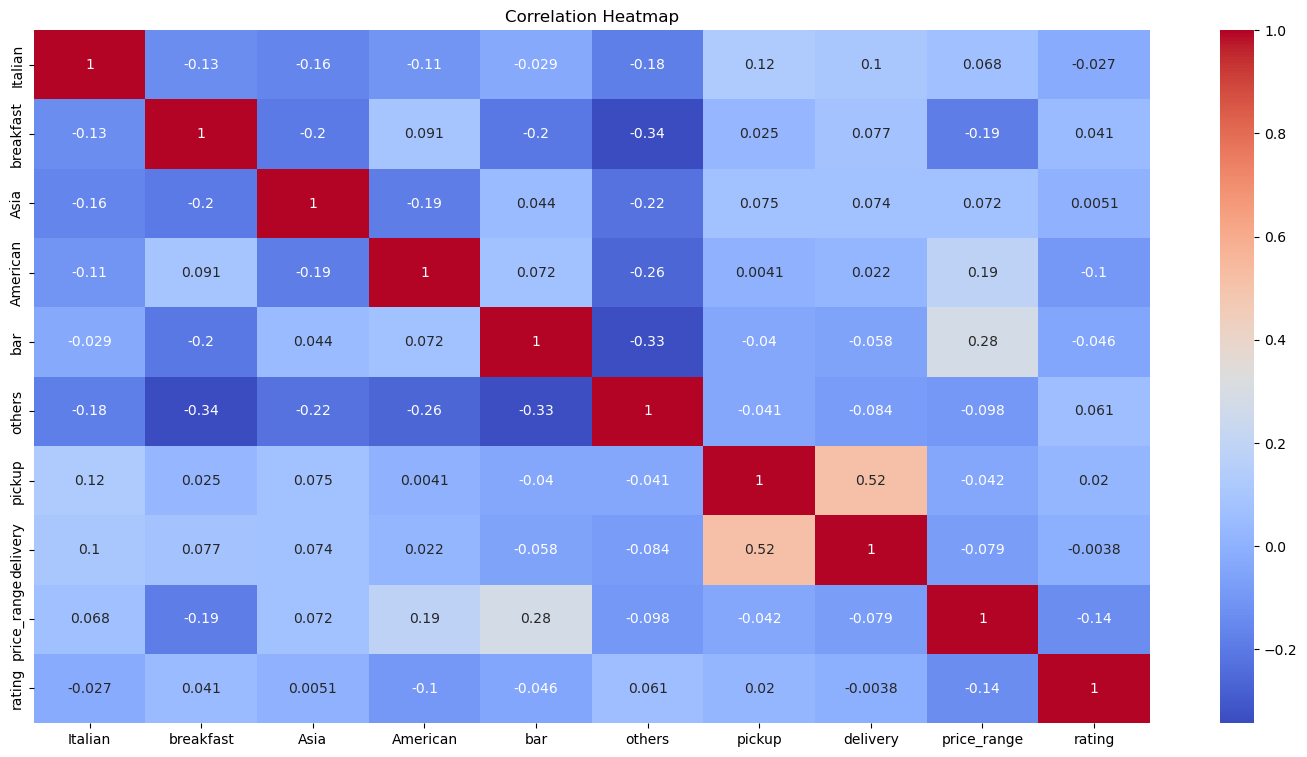

In [20]:
import seaborn as sns
import pandas as pd
import numpy as np

# Calculate correlation matrix from your DataFrame
corr_matrix = df.corr()

# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Adding title
plt.title('Correlation Heatmap')

# Displaying the plot
plt.show()

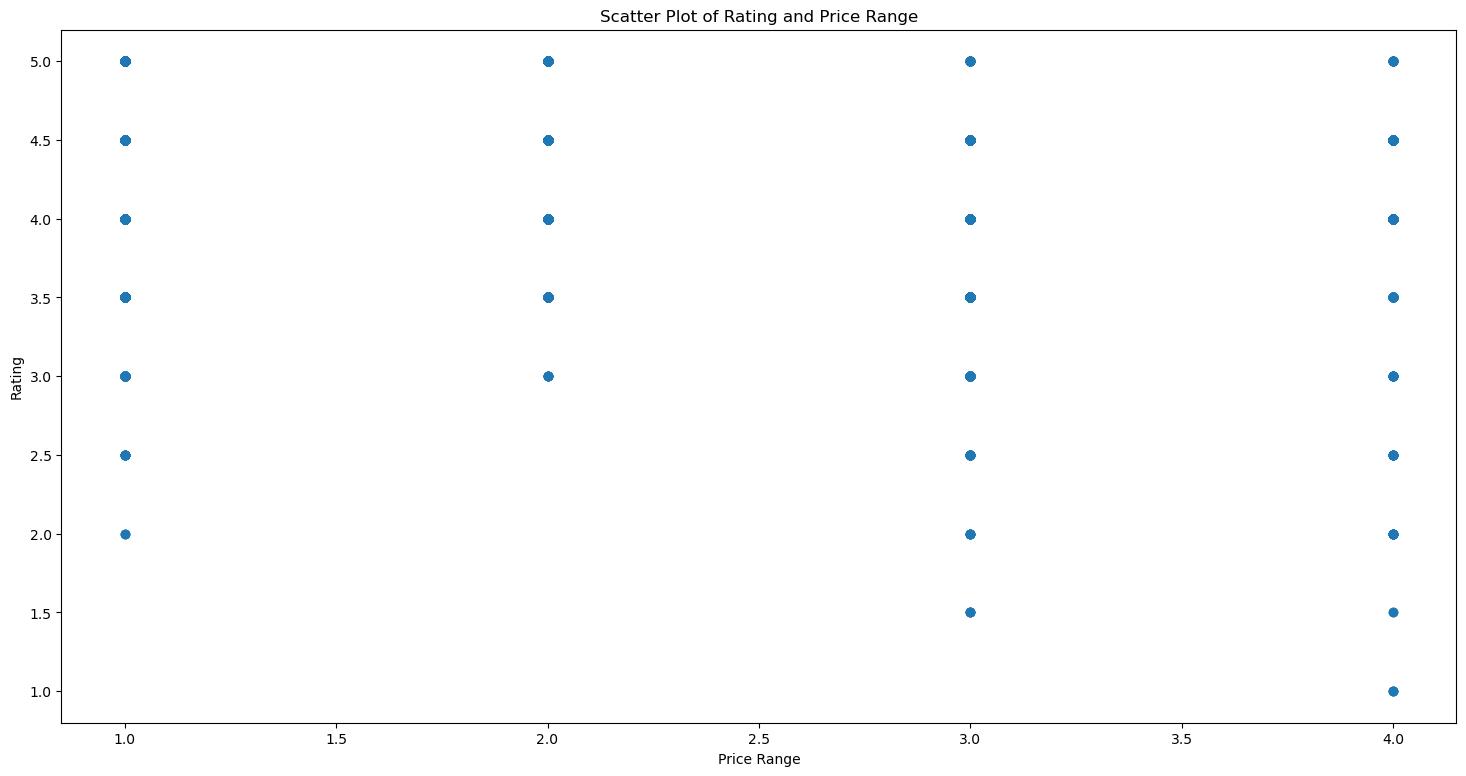

In [21]:
import matplotlib.pyplot as plt

plt.scatter(df['price_range'], df['rating'])

# Adding labels and title
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.title('Scatter Plot of Rating and Price Range')

# Displaying the plot
plt.show()

The graph indicates that the data is not biased and therefore the model will be able to predict more correctly. For example, if all the expensive restaurants only had a high rating, then as soon as the model had to return, an expensive restaurant would directly say that it was a high rating, which is really not necessarily true

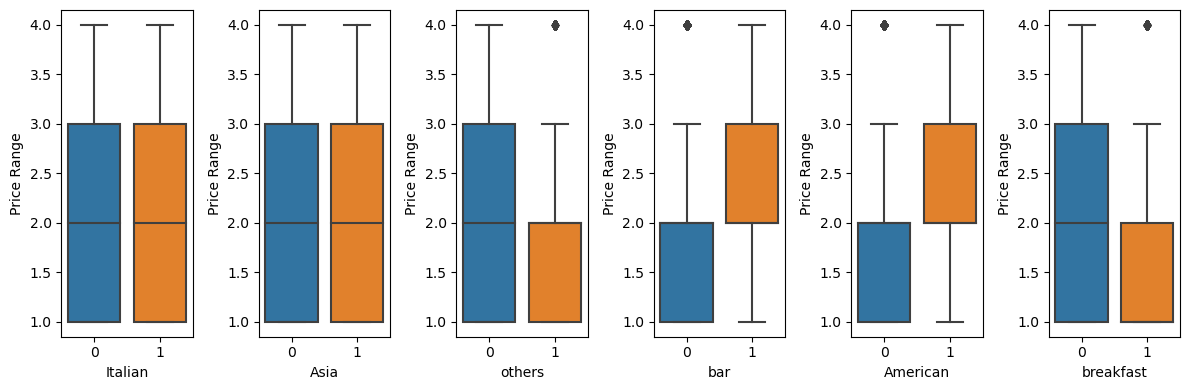

In [22]:
category_cols = ['Italian', 'Asia', 'others', 'bar', 'American', 'breakfast']

# Create subplots for each category
fig, axes = plt.subplots(nrows=1, ncols=len(category_cols), figsize=(12, 4))

# Iterate through each category column
for i, col in enumerate(category_cols):
    # Create a box plot for price_range in each category
    sns.boxplot(data=df, x=col, y='price_range', ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price Range')

# Adjust spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

In [23]:
df.head()

,name,Italian,breakfast,Asia,American,bar,others,pickup,delivery,price_range,rating
0,Prince Street Pizza,1,0,0,0,0,0,1,1,1,4.5
1,Best Bagel & Coffee,0,1,0,0,0,0,1,1,1,4.5
2,Los Tacos No.1,0,0,0,0,0,1,0,1,1,4.5
3,L'industrie Pizzeria,1,0,0,0,0,0,0,1,1,4.5
4,Taiyaki NYC,0,0,1,0,0,0,0,1,1,4.5


In [24]:
df.drop('name', axis=1, inplace=True)
df.head()

,Italian,breakfast,Asia,American,bar,others,pickup,delivery,price_range,rating
0,1,0,0,0,0,0,1,1,1,4.5
1,0,1,0,0,0,0,1,1,1,4.5
2,0,0,0,0,0,1,0,1,1,4.5
3,1,0,0,0,0,0,0,1,1,4.5
4,0,0,1,0,0,0,0,1,1,4.5


Dropping the names because they have no effect on the score and therefore are not relevant in prediction either

## The beginning of the models training prediction and scoring

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the feature matrix X and the target variable y
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]  # Select the last column as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred) 

# Print the mean squared error
print("Mean Squared Error:", mse)
score = model.score(X_test, y_test)
print("Model Score (R^2):", score)

Mean Squared Error: 0.20194722255080064
Model Score (R^2): 0.025796611256308943


this model is linear regression - explain about linear regression and why linear regression didn't work here. 

### Classificaiton 

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare the feature matrix X and the target variable y
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]  # Select the last column as the target variable

# Convert the continuous rating variable into categorical labels or rating ranges
bins = [0, 1.5, 2.5, 3.5, 4.5, 5]  # Define the bin boundaries
labels = ['1', '1.5', '2', '2.5', '3']  # Define the corresponding labels or rating ranges
y_categorical = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Fit the Logistic Regression model to the training data
logreg_model.fit(X_train, y_train)

# Make predictions using the Logistic Regression model
logreg_predictions = logreg_model.predict(X_test)

# Evaluate the performance of the Logistic Regression model using accuracy score
accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.7996146435452793


this is logistic regression - explain a bit about it and why it worked better 

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Prepare the feature matrix X and the target variable y
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]  # Select the last column as the target variable

# Convert the continuous rating variable into categorical labels or rating ranges
bins = [0, 1.5, 2.5, 3.5, 4.5, 5]  # Define the bin boundaries
labels = ['1', '1.5', '2', '2.5', '3']  # Define the corresponding labels or rating ranges
y_categorical = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Fit the KNN model to the training data
knn_model.fit(X_train, y_train)

# Make predictions using the KNN model
knn_predictions = knn_model.predict(X_test)

# Evaluate the performance of the KNN model using accuracy score
accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.7675016056518946


this is KNN - explain about it and why it worked better

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Convert rating to categorical variable
threshold = 2.5  # Set the threshold to distinguish between low and high ratings
df['rating_category'] = df['rating'].apply(lambda x: 'Low' if x <= threshold else 'High')

# Drop the original rating column
df.drop('rating', axis=1, inplace=True)

# Prepare the feature matrix X and the target variable y
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df['rating_category']  # Use the converted rating category as the target variable

# Apply Min-Max scaling to the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Perform cross-validation on the KNN model
knn_cv_scores = cross_val_score(knn_model, X_scaled, y, cv=5)  # Perform 5-fold cross-validation
knn_avg_cv_score = knn_cv_scores.mean()
print("KNN Cross-Validation Scores:", knn_cv_scores)
print("KNN Average Cross-Validation Score:", knn_avg_cv_score)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Perform cross-validation on the Logistic Regression model
logreg_cv_scores = cross_val_score(logreg_model, X_scaled, y, cv=5)  # Perform 5-fold cross-validation
logreg_avg_cv_score = logreg_cv_scores.mean()
print("Logistic Regression Cross-Validation Scores:", logreg_cv_scores)
print("Logistic Regression Average Cross-Validation Score:", logreg_avg_cv_score)


KNN Cross-Validation Scores: [0.98972383 0.98908157 0.985228   0.98908157 0.98908157]
KNN Average Cross-Validation Score: 0.9884393063583815
Logistic Regression Cross-Validation Scores: [0.98972383 0.98908157 0.98908157 0.98908157 0.98908157]
Logistic Regression Average Cross-Validation Score: 0.9892100192678228


this is both knn and logreg with scaling the data

validate that there is no overfitting

### Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for KNN model
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
print("KNN Confusion Matrix:")
print(knn_confusion_matrix)

# Confusion matrix for Logistic Regression model
logreg_confusion_matrix = confusion_matrix(y_test, logreg_predictions)
print("Logistic Regression Confusion Matrix:")
print(logreg_confusion_matrix)


KNN Confusion Matrix:
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   1   96 1439    0    0]
 [   1    6   14    0    0]]
Logistic Regression Confusion Matrix:
[[   0    0    0]
 [1536    0    0]
 [  21    0    0]]


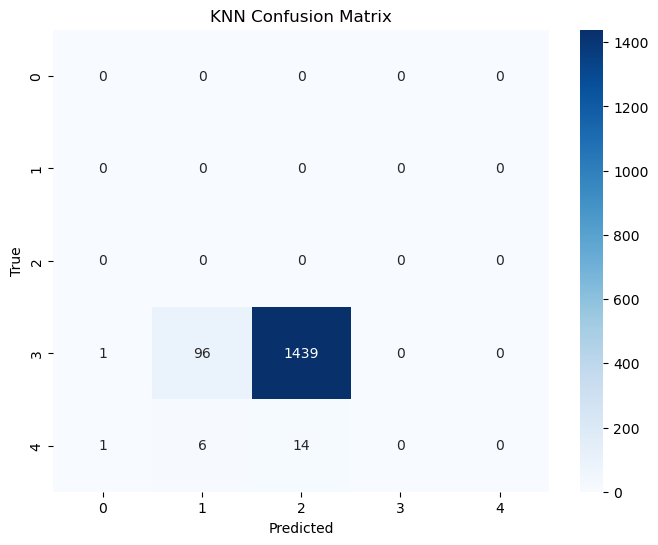

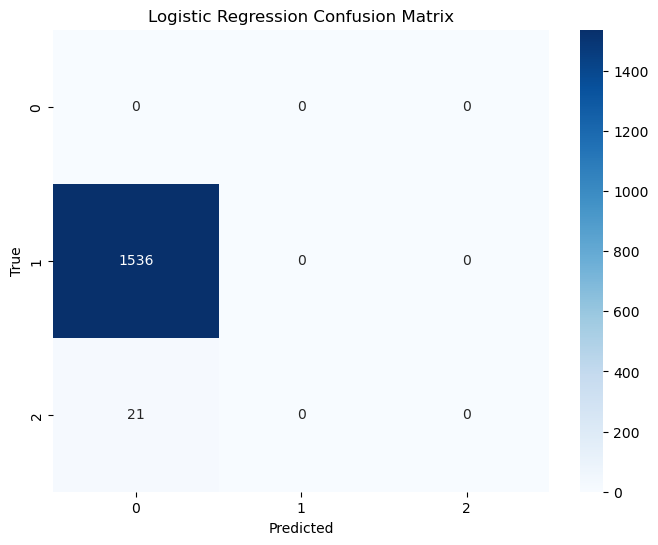

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the KNN Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')
plt.show()

# Plotting the Logistic Regression Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


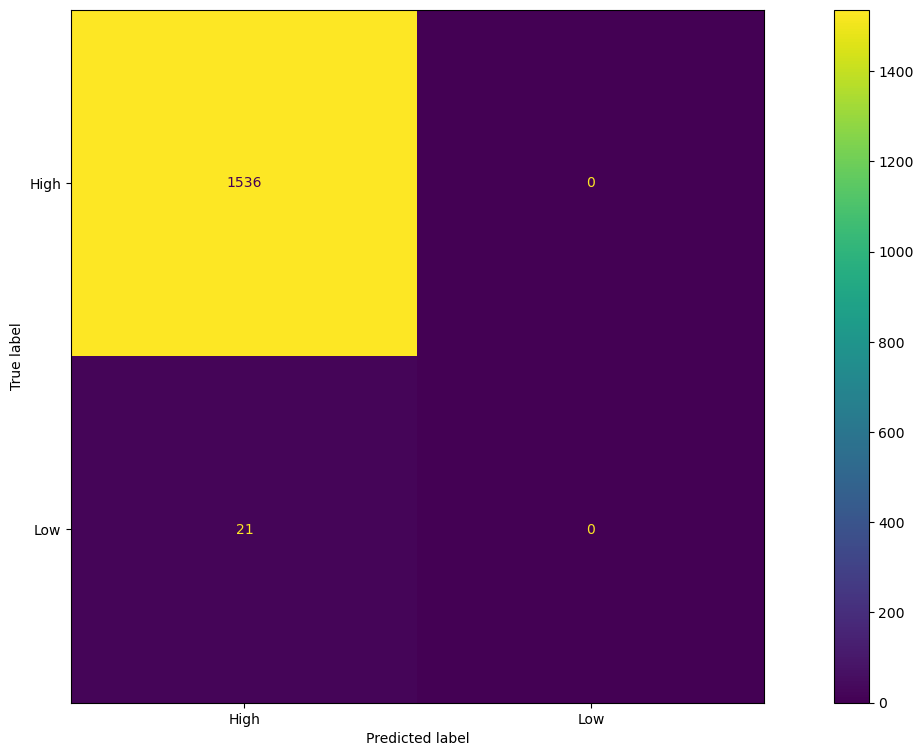

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix( knn_model, X_test , y_test)

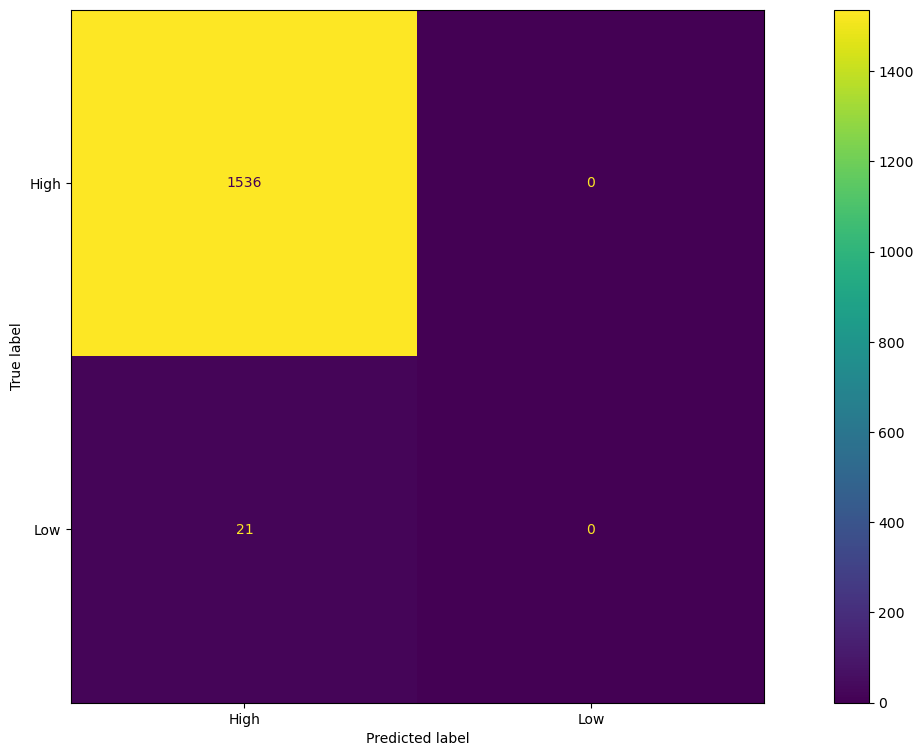

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg_model, X_test , y_test)

# Conclusion

צריך להיות בדגש שהדאטה התאים יותר לקלאסיפיקציה ולא לרגרסיה לפי מה שחשבת ואפשר לראות את זה בתוצאות